In [5]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

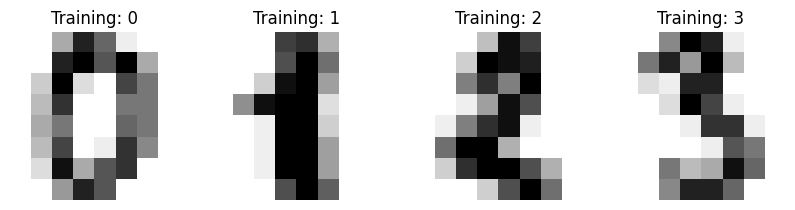

In [6]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [80]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
print(X_test[0], X_test[0].shape)
predicted = clf.predict([X_test)

[ 0.  0.  1. 11. 14. 15.  3.  0.  0.  1. 13. 16. 12. 16.  8.  0.  0.  8.
 16.  4.  6. 16.  5.  0.  0.  5. 15. 11. 13. 14.  0.  0.  0.  0.  2. 12.
 16. 13.  0.  0.  0.  0.  0. 13. 16. 16.  6.  0.  0.  0.  0. 16. 16. 16.
  7.  0.  0.  0.  0. 11. 13. 12.  1.  0.] (64,)


array([8])

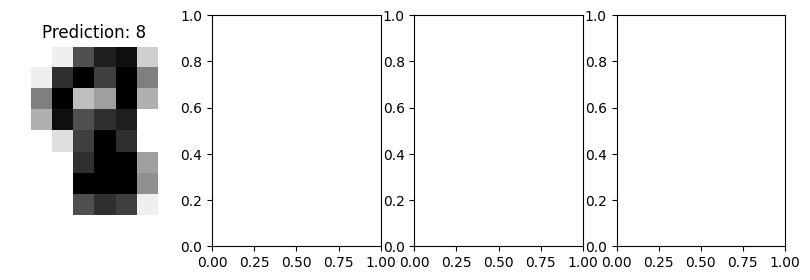

In [81]:
import matplotlib.pyplot as mp
import numpy as np

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
indx=0
for ax, image, prediction in zip(axes, X_test, predicted):
    indx=indx+1
    ax.set_axis_off()
    image = image.reshape(8, 8)
    
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    mp.imsave(str(prediction)+'_'+str(indx)+'.png', image)
    ax.set_title(f"Prediction: {prediction}")

Accuracy:: 0.9416666666666667
array:: [[0.11956157 0.11956157 0.18585844 0.46197649 0.78343334 0.55685413
  0.28414668 0.11956157]
 [0.11956157 0.11956157 0.61624158 0.46197649 0.18585844 0.55685413
  0.37748079 0.11956157]
 [0.11956157 0.11956157 0.6727957  0.40497728 0.37748079 0.84440275
  0.43157963 0.11956157]
 [0.11956157 0.11956157 0.31888707 0.50420393 0.61624158 0.78343334
  0.31888707 0.11956157]
 [0.11956157 0.11956157 0.11956157 0.11956157 0.11956157 0.61624158
  0.37748079 0.11956157]
 [0.11956157 0.43157963 0.40497728 0.11956157 0.11956157 0.78343334
  0.3472353  0.11956157]
 [0.11956157 0.18585844 0.61624158 0.50420393 0.31888707 0.84440275
  0.28414668 0.11956157]
 [0.11956157 0.11956157 0.11956157 0.6727957  0.84440275 0.43157963
  0.11956157 0.11956157]]
predicted:: [1]


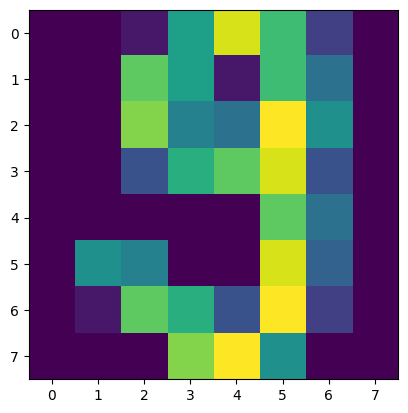

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

best_hyper_params = {'gamma': 0.001, 'C': 0.5}

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def show(inputImage):
    import matplotlib.pyplot as plt
    import matplotlib.image as img
    testImage = img.imread(inputImage)
    plt.imshow(testImage)

def train():
    import matplotlib.pyplot as plt
    from sklearn import datasets, svm, metrics
    from sklearn.model_selection import train_test_split
    digits = datasets.load_digits()
    # flatten the images
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))
    # Create a classifier: a support vector classifier
    
    clf = svm.SVC()
    
    #PART: setting up hyperparameter
    clf.set_params(**best_hyper_params)
    
    # Split data into 50% train and 50% test subsets
    X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
    )
    # Learn the digits on the train subset
    clf.fit(X_train, y_train)
    
    predicted_test = clf.predict(X_test)
    
    test_accuracy = metrics.accuracy_score(predicted_test,y_test)
    
    print('Accuracy::',test_accuracy )
    #disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    #disp.figure_.suptitle("Confusion Matrix")
    #print(f"Confusion matrix:\n{disp.confusion_matrix}")
    return clf

def predict(inputFile, clf):
    import matplotlib.image as img
    imgArr = mpimg.imread(inputFile)     
    gray = rgb2gray(imgArr) 
    print('array::', gray)
    predicted = clf.predict([gray.flatten()])
    print('predicted::',predicted)
    
inputimagePath='8_2.png'
show(inputimagePath)
clf = train()
predict(inputimagePath,clf)

[[0.11956157 0.11956157 0.18585844 0.46197649 0.78343334 0.55685413
  0.28414668 0.11956157]
 [0.11956157 0.11956157 0.61624158 0.46197649 0.18585844 0.55685413
  0.37748079 0.11956157]
 [0.11956157 0.11956157 0.6727957  0.40497728 0.37748079 0.84440275
  0.43157963 0.11956157]
 [0.11956157 0.11956157 0.31888707 0.50420393 0.61624158 0.78343334
  0.31888707 0.11956157]
 [0.11956157 0.11956157 0.11956157 0.11956157 0.11956157 0.61624158
  0.37748079 0.11956157]
 [0.11956157 0.43157963 0.40497728 0.11956157 0.11956157 0.78343334
  0.3472353  0.11956157]
 [0.11956157 0.18585844 0.61624158 0.50420393 0.31888707 0.84440275
  0.28414668 0.11956157]
 [0.11956157 0.11956157 0.11956157 0.6727957  0.84440275 0.43157963
  0.11956157 0.11956157]] (8, 8)


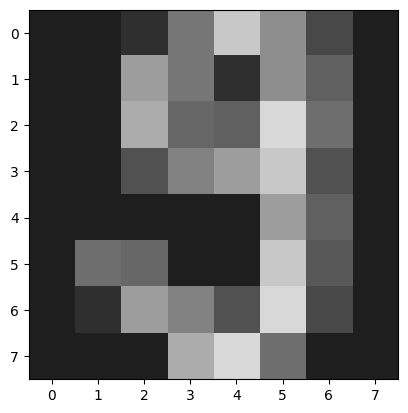

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('9_4.png')     
gray = rgb2gray(img)    
print(gray,gray.shape)
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()